# 独自データの分類
# TupleDatasetの可視化


In [1]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
from chainer.dataset import concat_examples
import inspect
from jupyterthemes import jtplot
jtplot.style()
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)



## データ用意

In [2]:
file = open("thick.txt", mode='r')
lines = file.readlines()
file.close()

arr_whole_data = [];
arr_whole_target = [];
for line in lines:
    arr = line.strip().split(",")
    arr_whole_data.append([int(arr[0]), int(arr[1])])
    arr_whole_target.append(int(arr[2]))

arr_whole_data[0:5]
arr_whole_target[0:5]

whole_data = np.array(arr_whole_data, np.float32)/np.array([640,480], np.float32)
whole_target = np.array(arr_whole_target, np.int32)

whole_data[0:5]
whole_target[0:5]

test_len = int(len(whole_data)/4)

#データセットを作る
dataset = datasets.TupleDataset(whole_data, whole_target)

#split_dataset_randomで、ランダムにデータセットを分けられる　学習データとテストデータに分ける
test, train = datasets.split_dataset_random(dataset, test_len, 1234)

#学習データ数
len(train)

#イテレータの作成
batch_size = 10
train_iter = iterators.SerialIterator(train, batch_size=batch_size)
test_iter = iterators.SerialIterator(test, batch_size=batch_size, repeat=False, shuffle=False)

[[618, 114], [596, 108], [483, 109], [431, 111], [406, 118]]

[0, 0, 0, 0, 0]

array([[ 0.96562499,  0.2375    ],
       [ 0.93124998,  0.22499999],
       [ 0.75468749,  0.22708334],
       [ 0.67343748,  0.23125   ],
       [ 0.63437498,  0.24583334]], dtype=float32)

array([0, 0, 0, 0, 0])

429

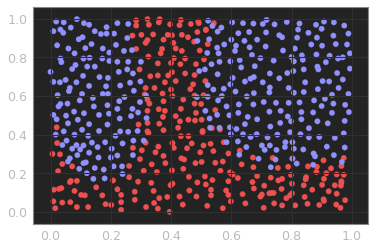

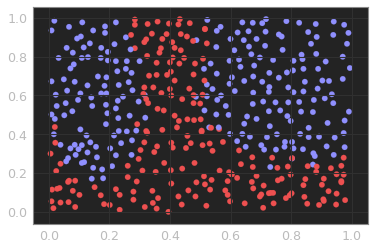

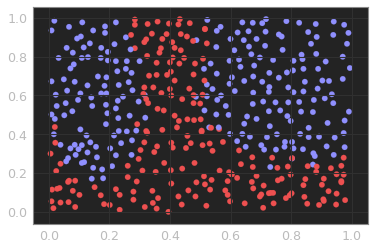

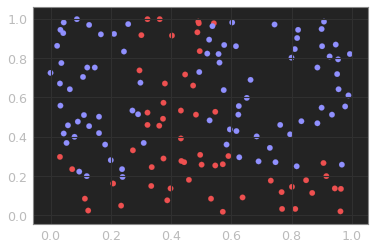

In [21]:
#学習用データの表示
#Tupleデータセットを可視化する…データセットから数値を抜き出してnp.arrayにもう一度戻す
def plotTupleDataSet(tupledataset, c1Col="#EE5050", c2Col="#9090FF", x=0, y=1):
    X = np.array([[dt[0][x] for dt in tupledataset],[dt[0][y] for dt in tupledataset]], np.float32).T
    y = np.array([dt[1] for dt in tupledataset], np.int32)
    cm = generate_cmap([c1Col, c2Col])
    plt.scatter(X[:,0], X[:,1], c=y, cmap = cm)

def plotWholeData():
    X = np.array([[dt[0][0] for dt in train],[dt[0][1] for dt in train]], np.float32).T
    y = np.array([dt[1] for dt in train], np.int32)
    cm = generate_cmap(['#EE5050', '#9090FF'])
    plt.scatter(X[:,0], X[:,1], c=y, cmap = cm)

plotTupleDataSet(dataset)
plt.show()
    
plotWholeData()
plt.show()

plotTupleDataSet(train)
plt.show()

plotTupleDataSet(test)
plt.show()

